### 1. Решите линейную систему:

In [1]:
import numpy as np
A = np.array([[1,2,3],
              [4,0,6],
              [7,8,9]])
B = np.array([12,2,1])
s = np.linalg.solve(A,B)
print(s)

[-9.2         0.9         6.46666667]


### 2. Найдите псевдорешение:

In [2]:
t = np.array([[1,2,-1],
              [3,-4,0],
              [8,-5,2],
              [2,-5,0],
              [11,4,-7]])
z = np.array([1,7,12,7,15])
s = np.linalg.lstsq(t,z, rcond=-1)
print(s)

(array([ 1.15601029, -0.889718  , -0.85029782]), array([0.66772534]), 3, array([14.89650167, 10.4695886 ,  2.73531577]))


### 3. Сколько решений имеет линейная система:
Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 

In [3]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
B = np.array([2,5,1])### в задании по ссылке [12,2,1]
d = np.linalg.det(A)
print(d) #значение нулевое

B = np.array([1,2,3]) ### меняем значение правого вектора
s = np.linalg.solve(A,B)
print(s) #одно решение

-9.51619735392994e-16
[-0.23333333  0.46666667  0.1       ]


### 4. Вычислите LU-разложение матрицы:
После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [4]:
 import scipy.linalg
A = np.array([[1,2,3],[2,16,21],[4,28,73]])
P, L, U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)
d = np.linalg.det(A)
print(d)
B = np.array([8,43,5])# - вектор правой части
s = np.linalg.solve(A,B)
print(s)
#в чем смысл разложения LU с точки зрения кода на питоне? выглядит как лишния операция, все равно же решается через solve с А

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
432.00000000000017
[ 4.5   4.75 -2.  ]


### 5. Найдите нормальное псевдорешение недоопределенной системы:
Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 

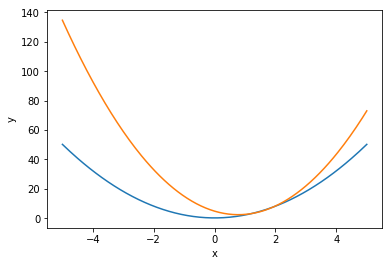

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

In [10]:
import matplotlib.pyplot as plt

A = np.array([[1,2,-1],[8,-5,2]])
B = np.array([1,12])

def Q(x,y,z):
    return (x**2 + y**2 + z**2)

x = np.linspace(-5,5,201)
z = np.linspace(-5,5,201)
plt.plot(x, Q(x,(x-z-1)/2,z))
plt.plot(x, Q(x,(8*x-1*z-11)/5,z))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

np.linalg.lstsq(A,B,rcond=-1)
#ну, значение x похоже на представленное на графике
#есть подозрение, что нужно использовать mplot3D, тк Z тут не видно

In [8]:
#но что-то я не понял как это делать, как выражать z в этом случае?
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(0, 15, 201)
y = (x - z - 1)/2
z = x + 2*y - 1

Axes3D.plot(x, y, z)

AttributeError: 'numpy.ndarray' object has no attribute 'has_data'

### 6. Найдите одно из псевдорешений вырожденной системы:
Попробуйте также отыскать и нормальное псевдорешение.

In [9]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

B = np.array([2,5,11])

Q,R = np.linalg.qr(A)
R1 = R[:2,:2]
B1 = np.dot(Q.T,B)[:2]
X1 = np.linalg.solve(R1,B1)
X = np.append(X1,0)
n = np.linalg.norm(X)
print(X) #псевдорешение
print(n) #норма псевдорешения

nS = np.linalg.lstsq(A,B, rcond=-1) #найдем нормальное псевдорешение, такое, чтобы n было минимальным при значениях X
print(nS)
m = nS[0] #нормальное псевдорешение
mn = np.linalg.norm(m) #минимальная норма
print(mn)
mn < n

[1.50000000e+00 9.45096256e-15 0.00000000e+00]
1.4999999999999893
(array([ 1.25,  0.5 , -0.25]), array([], dtype=float64), 2, array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))
1.3693063937629126


True